<a href="https://colab.research.google.com/github/jbtuku/Data-Engineering/blob/main/Datavalidation/statisticalasserion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving employees.csv to employees.csv
      birth_date        age  Age Valid (30-50)
0     1981-12-25  43.321013               True
1     1988-03-22  37.081451               True
2     2001-02-17  24.172485              False
3     2003-07-22  21.749487              False
4     2005-01-09  20.279261              False
...          ...        ...                ...
19995 1980-09-09  44.613279               True
19996 2001-04-14  24.019165              False
19997 1990-03-10  35.115674               True
19998 1980-03-20  45.086927               True
19999 1993-05-26  31.904175               True

[20000 rows x 3 columns]

=== STATISTICAL ASSERTION 2 ===
Assertion: The average employee age is between 30 and 50 years
Average Age: 35.11
Conclusion: Dataset is VALID for this assertion.


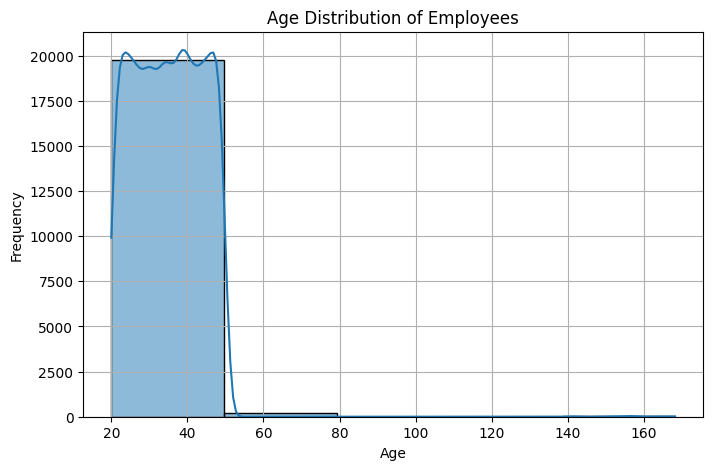

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the CSV file
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Convert 'birth_date' to datetime
df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')

# Calculate age
today = pd.to_datetime('today')
df['age'] = (today - df['birth_date']).dt.days / 365.25

# Determine if each age is within the 30-50 range
df['Age Valid (30-50)'] = df['age'].between(30, 50)

# Display the DataFrame with relevant columns
print(df[['birth_date', 'age', 'Age Valid (30-50)']])

# Calculate average age
avg_age = df['age'].mean()

print("\n=== STATISTICAL ASSERTION 2 ===")
print("Assertion: The average employee age is between 30 and 50 years")
print(f"Average Age: {avg_age:.2f}")

if 30 <= avg_age <= 50:
    print("Conclusion: Dataset is VALID for this assertion.")
else:
    print("Conclusion: Dataset is NOT VALID for this assertion.")

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=5, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
